In [1]:
# Answering the Research Questions

In [48]:
from os import path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
df = (
pd.read_csv("/Users/aidenb/Documents/Year_3/DATA_301/Project/Datafiniti_Fast_Food_Restaurants.csv")
    
    .dropna()
    .rename(columns = {'province':'state'})
    .drop(['address',
           'keys',
           'websites',
           'sourceURLs',
           'id',
           'dateUpdated',
           'categories'],
         axis = 1)
)
df

dateAdded           city country   latitude  longitude  \
0     2015-10-19T23:47:58Z      Thibodaux      US  29.814697 -90.814742   
1     2015-10-19T23:47:58Z      Thibodaux      US  29.814697 -90.814742   
2     2016-03-29T05:06:36Z   Pigeon Forge      US  35.803788 -83.580553   
3     2017-01-03T07:46:11Z   Pigeon Forge      US  35.782339 -83.551408   
4     2018-06-26T02:59:43Z         Morrow      US  33.562738 -84.321143   
...                    ...            ...     ...        ...        ...   
9995  2017-07-24T21:28:46Z  Winston-Salem      US  36.117563 -80.316553   
9996  2017-07-24T21:28:46Z  Winston-Salem      US  36.077718 -80.176748   
9997  2015-10-24T00:17:32Z   Kernersville      US  36.111015 -80.089165   
9998  2016-04-05T02:59:45Z         Wilson      US  35.719981 -77.945795   
9999  2016-11-08T02:26:32Z  Elizabethtown      US  34.632778 -78.624615   

                name postalCode state  
0     SONIC Drive In      70301    LA  
1     SONIC Drive In      70301    LA  
2          Taco Bell      37863    TN  
3             Arby's      37863    TN  
4     Steak 'n Shake      30260    GA  
...              ...        ...   ...  
9995       Pizza Hut      27106    NC  
9996       Pizza Hut      27107    NC  
9997       Pizza Hut      27284    NC  
9998       Pizza Hut      27893    NC  
9999       Pizza Hut      28337    NC  

[10000 rows x 8 columns]

In [3]:
# Research Question 1:
## What are the most common fast food restaurants in the US?

df['name'].value_counts()

McDonald's                         1898
Taco Bell                          1032
Burger King                         833
Subway                              776
Arby's                              663
                                   ... 
Ben and Jerry's                       1
Tom's Drive In                        1
The Dog Pit                           1
Great American Hamburger Pie Co       1
Five Guys Burgers Fries               1
Name: name, Length: 571, dtype: int64

In [6]:
### What are the top ten most common fast food restaurants in the US?

df['name'].value_counts().nlargest(10)

McDonald's         1898
Taco Bell          1032
Burger King         833
Subway              776
Arby's              663
Wendy's             628
Jack in the Box     330
Pizza Hut           230
Dairy Queen         218
Domino's Pizza      215
Name: name, dtype: int64

Text(0, 0.5, 'Restaurant')

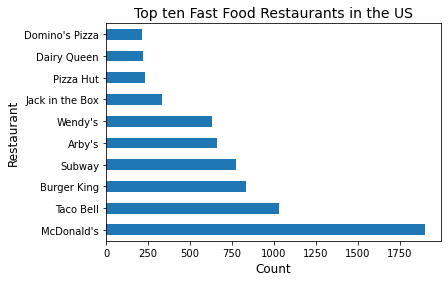

In [13]:
#### Visualize top 10 fast food restaurants

vis1 = df['name'].value_counts().nlargest(10)

vis1.plot.barh()
plt.title('Top ten Fast Food Restaurants in the US', fontsize = 14)
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Restaurant', fontsize = 12)

In [22]:
#Research Question 2:
## What city has the most McDonalds per capita?

df1 = (df
       .loc[lambda df: df['name'].str.contains('McDonald')]
       ['city'].value_counts().nlargest(10)
      )
df1

Houston          27
Las Vegas        19
Louisville       18
Orlando          18
Miami            17
Charlotte        13
Phoenix          13
Oklahoma City    12
Portland         12
Minneapolis      12
Name: city, dtype: int64

Text(0.5, 0, 'Count')

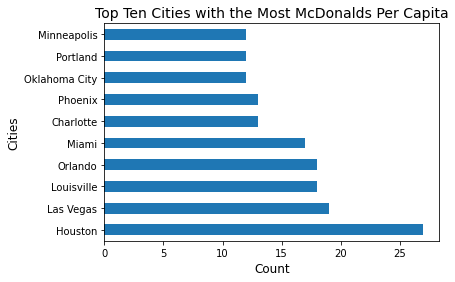

In [25]:
### Visualize

vis2 = df1
vis2.plot.barh()
plt.title('Top Ten Cities with the Most McDonalds Per Capita', fontsize = 14)
plt.ylabel('Cities', fontsize = 12)
plt.xlabel('Count', fontsize = 12)

In [26]:
## What city has the most Taco Bells per capita?

df2 = (df
      .loc[lambda df: df['name'].str.contains('Taco Bell')]
      ['city'].value_counts().nlargest(10)
      )
df2

Columbus        15
Phoenix         11
Las Vegas       11
Orlando         10
Glendale        10
Dallas           9
Denver           8
Tucson           7
Mesa             7
Indianapolis     7
Name: city, dtype: int64

Text(0.5, 0, 'Count')

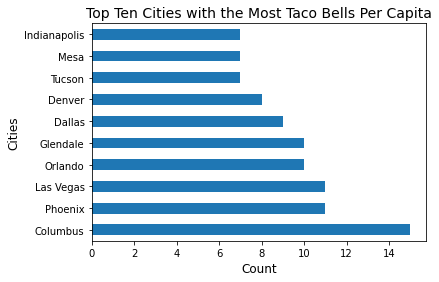

In [27]:
### Visualize

vis3 = df2
vis3.plot.barh()
plt.title('Top Ten Cities with the Most Taco Bells Per Capita', fontsize = 14)
plt.ylabel('Cities', fontsize = 12)
plt.xlabel('Count', fontsize = 12)

In [28]:
## What city has the most Burger Kings per capita?

df3 = (df
      .loc[lambda df: df['name'].str.contains('Taco Bell')]
      ['city'].value_counts().nlargest(10)
      )
df3

Columbus        15
Phoenix         11
Las Vegas       11
Orlando         10
Glendale        10
Dallas           9
Denver           8
Tucson           7
Mesa             7
Indianapolis     7
Name: city, dtype: int64

Text(0.5, 0, 'Count')

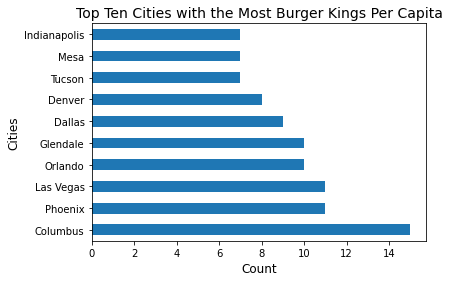

In [29]:
### Visualize

vis4 = df3
vis4.plot.barh()
plt.title('Top Ten Cities with the Most Burger Kings Per Capita', fontsize = 14)
plt.ylabel('Cities', fontsize = 12)
plt.xlabel('Count', fontsize = 12)

Text(0.5, 0, 'State')

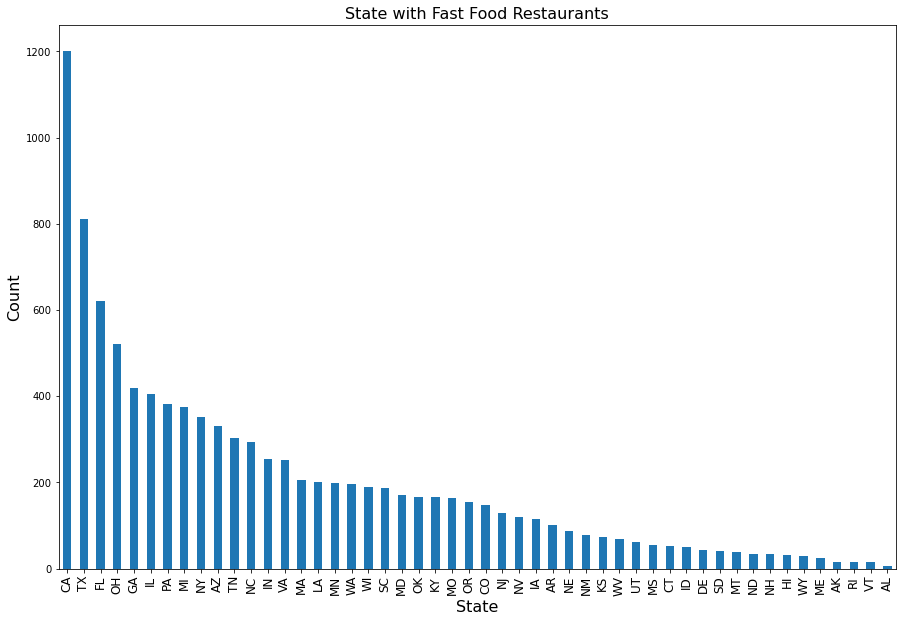

In [37]:
## What state has the most and what state has the least fast food restaurants per capita?

df5 = df['state'].value_counts()

df5.plot.bar()
plt.rcParams['figure.figsize'] = (5,10)
plt.xticks(fontsize = 12)
plt.title('States with Fast Food Restaurants', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xlabel('State', fontsize = 16)

In [ ]:
## Analysis 
### - California has the most fast food restaurants per capita, and Alaska has the least.
### - *Note - Alaska's popoulation is only marginally larger than Vermonts and has about 70 times the area than Vermont does.*

In [54]:
# Research Question 3
## divided along the 100th meridian, do the Western or Eastern states contain more fast-food chains?
df['latitude'] = df ['latitude'].astype(int)
df['longitude'] = df['longitude'].astype(int)
df.head()

dateAdded          city country  latitude  longitude  \
0  2015-10-19T23:47:58Z     Thibodaux      US        29        -90   
1  2015-10-19T23:47:58Z     Thibodaux      US        29        -90   
2  2016-03-29T05:06:36Z  Pigeon Forge      US        35        -83   
3  2017-01-03T07:46:11Z  Pigeon Forge      US        35        -83   
4  2018-06-26T02:59:43Z        Morrow      US        33        -84   

             name postalCode state  
0  SONIC Drive In      70301    LA  
1  SONIC Drive In      70301    LA  
2       Taco Bell      37863    TN  
3          Arby's      37863    TN  
4  Steak 'n Shake      30260    GA

In [55]:
q_low = df['latitude'].quantile(0.01)
q_hi  = df['latitude'].quantile(0.99)

df_filtered = df[(df['latitude'] < q_hi) & (df['latitude'] > q_low)]
df_filtered


dateAdded           city country  latitude  longitude  \
0     2015-10-19T23:47:58Z      Thibodaux      US        29        -90   
1     2015-10-19T23:47:58Z      Thibodaux      US        29        -90   
2     2016-03-29T05:06:36Z   Pigeon Forge      US        35        -83   
3     2017-01-03T07:46:11Z   Pigeon Forge      US        35        -83   
4     2018-06-26T02:59:43Z         Morrow      US        33        -84   
...                    ...            ...     ...       ...        ...   
9995  2017-07-24T21:28:46Z  Winston-Salem      US        36        -80   
9996  2017-07-24T21:28:46Z  Winston-Salem      US        36        -80   
9997  2015-10-24T00:17:32Z   Kernersville      US        36        -80   
9998  2016-04-05T02:59:45Z         Wilson      US        35        -77   
9999  2016-11-08T02:26:32Z  Elizabethtown      US        34        -78   

                name postalCode state  
0     SONIC Drive In      70301    LA  
1     SONIC Drive In      70301    LA  
2          Taco Bell      37863    TN  
3             Arby's      37863    TN  
4     Steak 'n Shake      30260    GA  
...              ...        ...   ...  
9995       Pizza Hut      27106    NC  
9996       Pizza Hut      27107    NC  
9997       Pizza Hut      27284    NC  
9998       Pizza Hut      27893    NC  
9999       Pizza Hut      28337    NC  

[9680 rows x 8 columns]

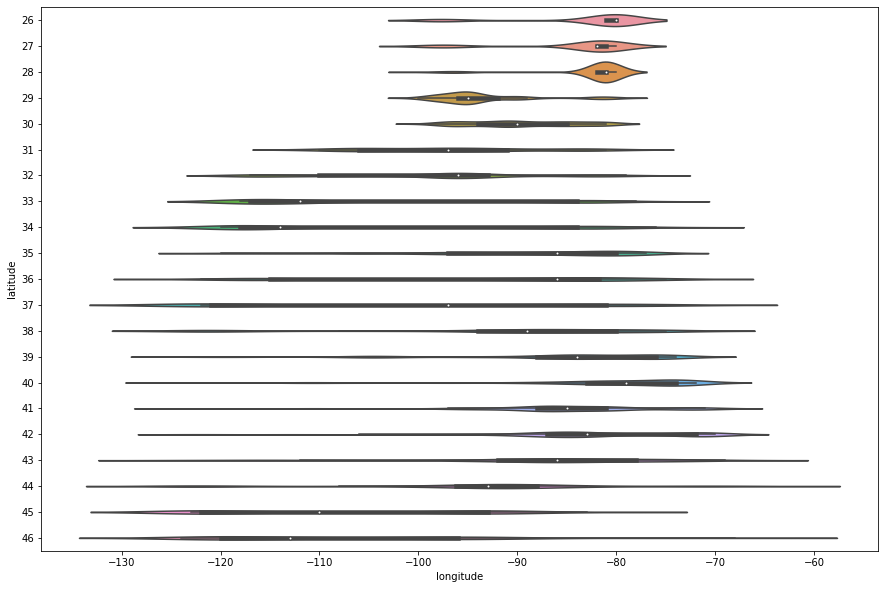

In [56]:
sns.violinplot(data = df_filtered, x = 'longitude', y = 'latitude', orient = 'h')
plt.rcParams['figure.figsize'] = (15,10)

In [ ]:
## from the violin plot above it is evident that there is a higher concentration of fast-food chains East of the 100th meridian, to roughly the 70th meridian. 
### the greatest concentration of fast-food chains in these Eastern states is North of the 35th parallel.